Desafio Regularizacion realizado por Cristobal Novoa

# Desafío - Regularización

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo
Desafío - Regularización.

# Requerimientos

● En esta ocasión utilizaremos datos de la composición química de muestras de vino.

● Nuestro propósito será tratar de predecir su calidad a partir de su composición
química.

● Comience su estudio realizando un breve análisis exploratorio y descriptivo:

○ Identifique el tipo de datos de cada columna.

○ Identifique outliers univariados y multivariados. Los primeros los puede
encontrar realizando boxplots de cada atributo, los segundos estudiando los
scatterplot entre pares de atributos.

○ Encuentre la cantidad de valores faltantes en cada columna.

○ Grafique la distribución empírica de cada atributo.

# Ejercicio 1: Preparación del Ambiente de Trabajo

● Importe las librerías básicas.

● Importe los métodos asociados a regularización.

● Importe la base de datos.

In [1]:
# Se importan librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split

In [2]:
# Se carga csv y muestran filas y columnas
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


La base de datos no tiene valores nulos

# Ejercicio 2: Análisis exploratorio

● Identifique el tipo de datos de cada columna.

● Identifique outliers univariados y multivariados. Los primeros los puede encontrar
realizando.

● boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de
atributos.

In [5]:
# Se identifican el tipo de datos en las columnas
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

En su mayoria corresponden a atributos continuos, exceptuando quality que es una variable categorica, que puede ser tratada como continua.

# Visualizacion vector objetivo 'quality'

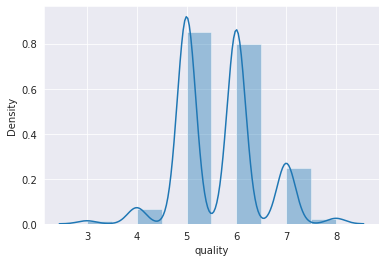

In [6]:
sns.distplot(df['quality'], bins=10)

La distribucion del vector objetivo se acerca a la normalidad. 

# Visualizacion de variables

In [7]:
lista_var = df.columns.tolist()
lista_var.remove('quality')

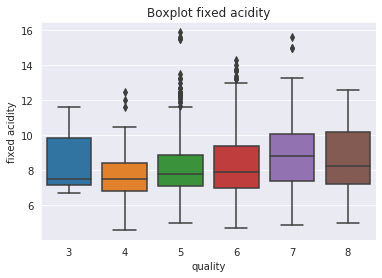

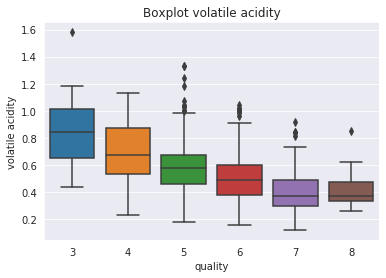

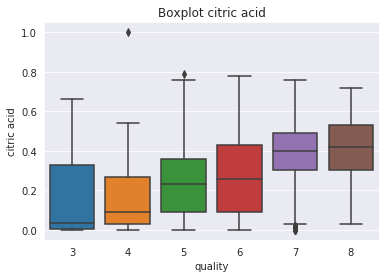

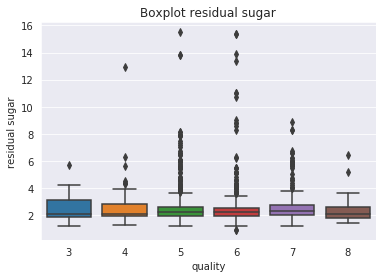

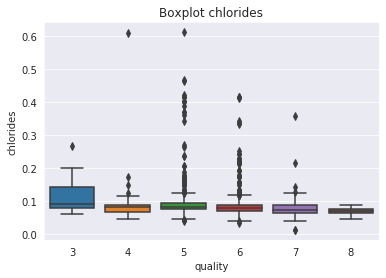

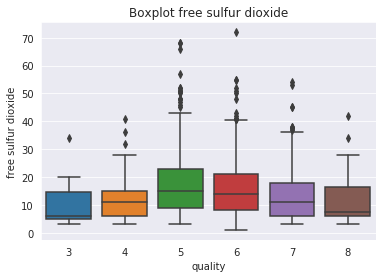

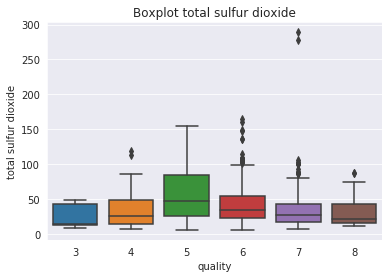

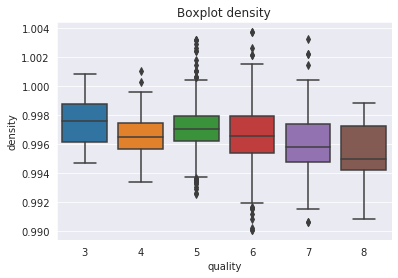

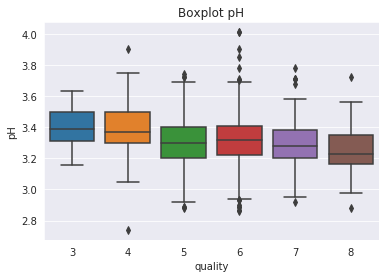

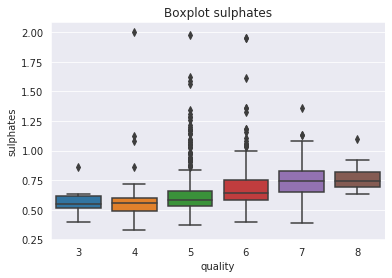

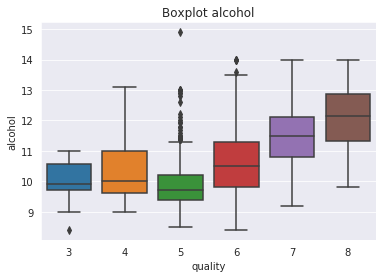

In [8]:
# Se usa variable categorica quality para segmentar las variables continuas e identificar outliers
for i in lista_var:
    plt.title(f'Boxplot {i}')
    sns.boxplot(x="quality", y= i, data=df)
    plt.show()

## Se muestran outliers en los boxplots. En el boxplot de alcohol segmentado por quality,  se puede observar que hay una gran cantidad de outliers en la calidad del vino 5, que a su vez tiene un rango intercuartilico mas acotado que el resto de los boxplot.  

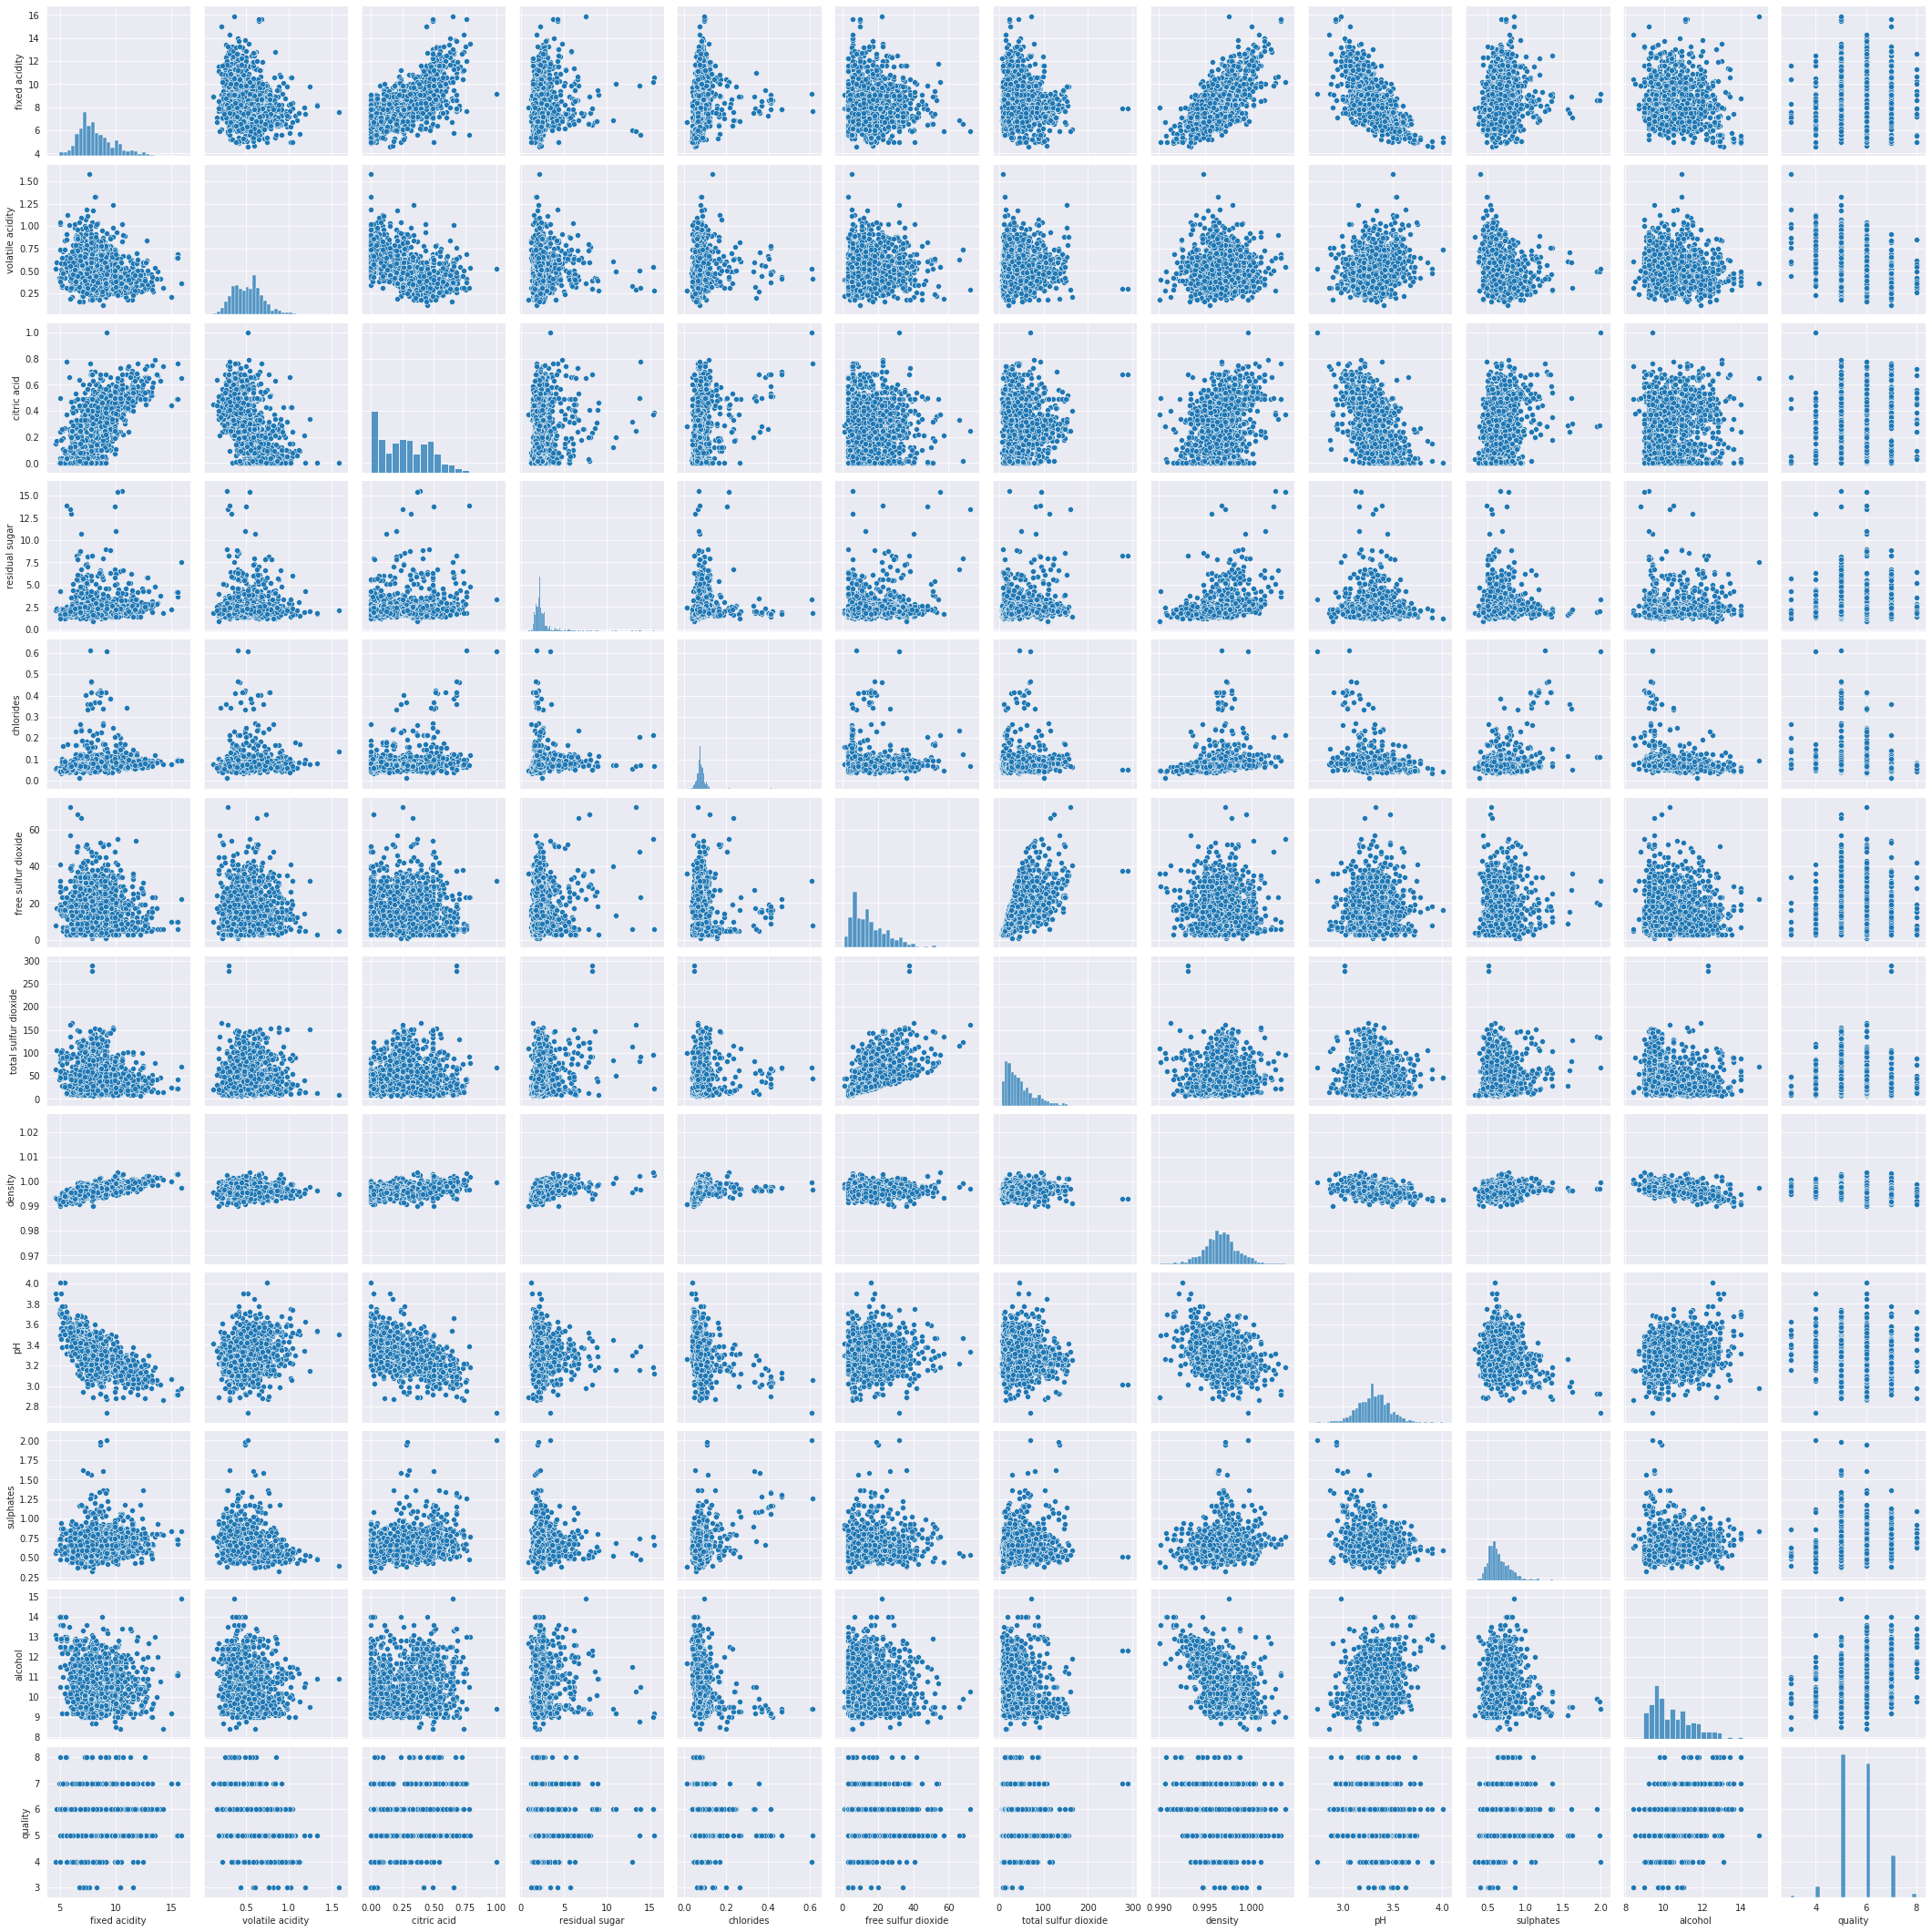

In [9]:
#Se genera pairplot para comparar pares de atributos y observar outliers
sns.pairplot(df) 

Se observan outliers de las variables en los graficos. 
Debido a la cantidad de variables, es dificil distinguir la informacion por variable. 
Se genera heatmap adicional para ver correlaciones de los atributos

# Heatmap

Text(0.5, 1, 'Heatmap correlaciones > 0.6\n')

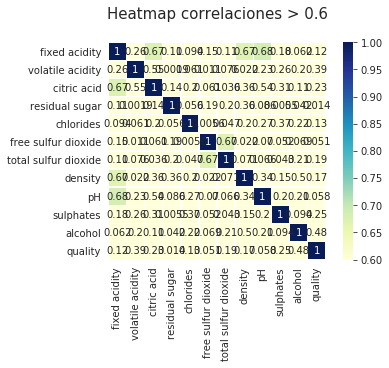

In [10]:
# Se genera heatmap para ver las correlaciones absolutas entre variables que sean superiores a 0.6
corr_mat = abs(df.corr())
sns.heatmap(corr_mat, cmap="YlGnBu", annot=True,linewidths=.5, square=True, vmin=0.6)
plt.title('Heatmap correlaciones > 0.6\n', fontsize = 15)

Las principales correlaciones se dan entre las variables:
1. **citric acid y fixed acidity** 
2. **density y fixed acidity** 
3. **total sulfur dioxide y free sulfur dioxide** 
4. **pH y fixed acidity**
    

# Ejercicio 3: Regularización de modelos
● Genere tres modelos, correspondientes a RidgeCV , LassoCV y ElasticNetCV. Para
cada uno de ellos implemente los siguientes pasos:

○ Entrene los modelos con 10 validaciones cruzadas.

○ Extraiga los coeficientes estimados, el mejor valor alpha, MAE
(median_absolute_error) y RMSE (raiz cuadrada de
mean_squared_error) asociado a cada modelo.

○ En base a la información solicitada, responda lo siguiente:

○ ¿Qué modelo presenta un mejor desempeño en base a las métricas?

○ ¿Qué atributos mantienen un comportamiento similar a lo largo de cada
modelo?

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# Normalizamos el dataframe
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [13]:
# X será nuestro conjunto de atributos. y será nuestra variable objetivo
X = df_scaled.loc[:, 'fixed acidity': 'alcohol'] # Tomamos todas las columnas menos quality
y = df_scaled['quality'] # asignamos como target la variable 'quality'
#Separamos los subsets de test y train
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.33, random_state = 4982)

# RidgeCV

In [14]:
#Se genera modelo Ridge CV con 10 validaciones cruzadas
ridge_cv = RidgeCV(cv = 10)
model_ridge = ridge_cv.fit(X_train, y_train)

In [15]:
#Se genera funcion para reportar las principales metricas
def report_regularization(model, X_test, y_test):
    print('Valor del parámetro de regularización: {0}'.format(model.alpha_))
    print('Coeficientes finales: \n{0}'.format(model.coef_))
    y_hat = model.predict(X_test)
    print('R-squared: {0}'.format(r2_score(y_test,y_hat)))
    print('Mean Squared Error: {0}'.format(mean_squared_error(y_test, y_hat)))
    print('Mean Absolute error: {0}'.format(mean_absolute_error(y_test, y_hat)))
    print('Test RMSE: {0}'.format(np.sqrt(mean_squared_error(y_test, y_hat))))

In [16]:
#Se reportan metricas RidgeCV
report_regularization(ridge_cv, X_test, y_test)

Valor del parámetro de regularización: 10.0
Coeficientes finales: 
[ 0.09807997 -0.20389665 -0.02680738  0.05881563 -0.09266509  0.0470567
 -0.11494013 -0.09252769 -0.08102277  0.18010379  0.34315065]
R-squared: 0.3569135645532068
Mean Squared Error: 0.7193739034209461
Mean Absolute error: 0.6503686150218942
Test RMSE: 0.8481591262380817


# LassoCV

In [17]:
#Se genera modelo y reportan metricas Lasso CV
lasso_cv = LassoCV()
model_lasso = lasso_cv.fit(X_train, y_train)
report_regularization(model_lasso, X_test, y_test)

Valor del parámetro de regularización: 0.011230640361455758
Coeficientes finales: 
[ 0.0129169  -0.20134762 -0.          0.0211903  -0.08181691  0.02501663
 -0.09366352 -0.00799413 -0.09723849  0.15618755  0.38115238]
R-squared: 0.3563389940011842
Mean Squared Error: 0.7200166336015509
Mean Absolute error: 0.6530196821910479
Test RMSE: 0.8485379388109591


# Elastic Net

In [18]:
#Se genera modelo y reportan metricas Elastic CV
elastic_cv = ElasticNetCV(cv = 10)
model_elastic = elastic_cv.fit(X_train, y_train)
report_regularization(model_elastic, X_test, y_test)

Valor del parámetro de regularización: 0.0009722952231687664
Coeficientes finales: 
[ 0.09517554 -0.20555442 -0.02900334  0.05741788 -0.09266303  0.04723435
 -0.11479655 -0.08791873 -0.08359574  0.18031379  0.34839457]
R-squared: 0.3573240462137204
Mean Squared Error: 0.7189147275184079
Mean Absolute error: 0.6499572835028166
Test RMSE: 0.8478883933150683


In [19]:
# Se crea un dataframe para facilitar la comparacion entre los atributos
data_reg = {'ridge_cv': model_ridge.coef_,'lasso_cv': model_lasso.coef_, 'elastic_cv': model_elastic.coef_}
lista_index = df.columns.tolist()
lista_index.remove('quality')
pd.DataFrame(data= data_reg, index = lista_index)

,ridge_cv,lasso_cv,elastic_cv
fixed acidity,0.098080,0.012917,0.095176
volatile acidity,-0.203897,-0.201348,-0.205554
citric acid,-0.026807,-0.000000,-0.029003
residual sugar,0.058816,0.021190,0.057418
chlorides,-0.092665,-0.081817,-0.092663
free sulfur dioxide,0.047057,0.025017,0.047234
total sulfur dioxide,-0.114940,-0.093664,-0.114797
density,-0.092528,-0.007994,-0.087919
pH,-0.081023,-0.097238,-0.083596
sulphates,0.180104,0.156188,0.180314


## En base a MSE y MAE el mejor modelo correspondería al modelo Lasso. El modelo ElasticNet tiene un desempeño medio entre ambos modelos, lo que tiene sentido siendo una combinacion de Lasso y Ridge 

## Los atributos que mantienen un comportamiento similar a lo largo de los tres modelos son volatile acidity, chlorides, total sulfur dioxide, sulphates y alcohol.